# Body signal of smoking dataset

https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking?select=smoking.csv

- ID : index
- gender
- age : 5-years gap
- height(cm) 키
- weight(kg) 몸무게
- waist(cm) : Waist circumference length 허리둘레
- eyesight(left) 좌측 시력
- eyesight(right) 우측 시력
- hearing(left) 청력
- hearing(right) 청력
- systolic : Blood pressure 수축기 혈압
- relaxation : Blood pressure 이완기 혈압
- fasting blood sugar 공복혈당
- Cholesterol : total 콜레스테롤 총합량
- triglyceride 수치. 콜레스테롤의 한 종류
- HDL : 콜레스테롤의 한 종류  
- LDL : 콜레스테롤의 한 종류
- hemoglobin 혈색소, 헤모글로빈 수치
- Urine protein 단백뇨
- serum creatinine 혈청 크레아티닌 신장질환여부 판단
- AST : glutamic oxaloacetic transaminase type  간기능 척도
- ALT : glutamic oxaloacetic transaminase type  간기능 척도
- Gtp : γ-GTP 간해독요소
- oral : Oral Examination status 구강검사여부
- dental caries 충치
- tartar : tartar status 치석
- smoking

In [24]:
from typing import Union
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#scipy modules
from scipy import stats
from scipy.stats import norm
from scipy.stats import skewtest as skew
from scipy.stats import kurtosistest as kurtosis

#sklearn modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix



%matplotlib inline

## Data Loading

In [25]:
data = pd.read_csv("smoking.csv")
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [26]:
def data_explanation(data):
    with open('./data_description.txt','w') as f:
        for i in data.columns:
            f.write(f'Feature Name: {i} \n')
            f.write(f'# of data: {len(data[i])} \n')
            f.write(f'# of unique data: {len(data[i].unique())} \n')
            f.write(f'unique datas: {data[i].unique()} \n\n')
    f.close()
data_explanation(data)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

## Data Preprocessing

In [28]:
feature_names = data.columns
feature_names

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [29]:
# 결측치 확인

data[data.isna()].count()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

### ID

In [30]:
# Id 대신 index 번호 사용하자.
data.drop(columns=['ID'],axis=1,inplace=True)

### Binary Variables

2진 변수 중에 object type 변수는 0,1 로 변환

In [31]:
data.gender.unique()

array(['F', 'M'], dtype=object)

In [32]:
LE = LabelEncoder() #Female : 0, Male : 1
data['gender'] = LE.fit_transform(data['gender'])
data['gender']

0        0
1        0
2        1
3        1
4        0
        ..
55687    0
55688    0
55689    0
55690    1
55691    1
Name: gender, Length: 55692, dtype: int32

In [33]:
data.tartar.unique()

array(['Y', 'N'], dtype=object)

In [34]:
LE = LabelEncoder() #Y = 1, N = 0
data['tartar'] = LE.fit_transform(data['tartar'])
data['tartar']

0        1
1        1
2        0
3        1
4        0
        ..
55687    1
55688    1
55689    0
55690    0
55691    1
Name: tartar, Length: 55692, dtype: int32

### oral

변수가 1개밖에 존재하지 않음. --> Drop column

In [35]:
data['oral'].unique()

array(['Y'], dtype=object)

In [36]:
data.drop(columns=['oral'],axis=1,inplace=True)

### Scaling

In [37]:
data.dtypes

gender                   int32
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int32
smoking                  int64
dtype: object

In [40]:
from sklearn.preprocessing import scale #standardizer 평균 0 분산을 동일하게 조정해준다.

numerical_variables = [1,2,3,4,5,6,9,10,11,12,13,14,15,16,18,19,20,21]
data_input = data.iloc[:,numerical_variables]
data_input_scaled = scale(data_input,axis=0,with_mean=True,with_std=True)
data.iloc[:,numerical_variables] = data_input_scaled

In [41]:
data.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,-0.346517,-1.049465,-0.457476,-0.080484,0.384861,-0.015315,1.0,1.0,-0.547989,...,0.269644,-1.101061,1.0,-0.838461,-0.422775,-0.259666,-0.257550,0,1,0
1,0,-0.346517,-0.505663,-0.457476,-0.112832,-0.436715,-0.838428,1.0,1.0,-0.182381,...,0.294079,-1.228898,1.0,-1.289883,-0.216113,-0.259666,-0.436511,0,1,0
2,1,0.896099,0.581943,-0.457476,-0.220659,-0.436715,-0.426872,1.0,1.0,1.206928,...,0.880501,0.752585,1.0,0.515806,-0.267779,-0.356604,-0.356973,0,0,1
3,1,-0.346517,0.038140,0.322543,0.641955,1.001044,1.013576,1.0,1.0,-1.571690,...,2.713072,0.049478,1.0,0.515806,-0.371110,-0.033477,-0.436511,0,1,0
4,0,-0.346517,-1.049465,-0.457476,0.426302,-0.025927,-0.015315,1.0,1.0,-0.109259,...,-0.194607,-1.356736,1.0,-1.289883,-0.526106,-0.421230,-0.356973,0,0,0


In [42]:
data.describe()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
count,55692.000000,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,55692.000000,55692.000000,5.569200e+04,...,5.569200e+04,5.569200e+04,55692.000000,5.569200e+04,5.569200e+04,5.569200e+04,5.569200e+04,55692.000000,55692.000000,55692.000000
mean,0.635657,-1.805318e-17,1.201079e-15,3.808393e-16,-9.915855e-16,-3.980632e-16,3.444777e-17,1.025587,1.026144,3.957666e-16,...,6.315425e-17,8.576858e-16,1.087212,2.380724e-16,2.653754e-17,-1.633080e-17,2.832372e-17,0.213334,0.555556,0.367288
std,0.481250,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.157902,0.159564,1.000009e+00,...,1.000009e+00,1.000009e+00,0.404882,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,0.409665,0.496908,0.482070
min,0.000000,-2.003338e+00,-3.768478e+00,-2.797535e+00,-3.347633e+00,-1.874474e+00,-1.867320e+00,1.000000,1.000000,-3.692213e+00,...,-2.784641e+00,-6.214566e+00,1.000000,-3.546993e+00,-1.042761e+00,-8.412949e-01,-7.745503e-01,0.000000,0.000000,0.000000
25%,0.000000,-3.465172e-01,-5.056625e-01,-8.474863e-01,-6.519654e-01,-4.367151e-01,-4.268720e-01,1.000000,1.000000,-6.942316e-01,...,-5.611210e-01,-6.536288e-01,1.000000,-3.870386e-01,-3.711097e-01,-3.889170e-01,-4.563961e-01,0.000000,0.000000,0.000000
50%,1.000000,-3.465172e-01,3.814000e-02,-6.746668e-02,-5.005079e-03,-2.592689e-02,-1.531550e-02,1.000000,1.000000,-1.092595e-01,...,-4.800117e-02,1.133970e-01,1.000000,6.438350e-02,-1.644478e-01,-1.950407e-01,-2.973191e-01,0.000000,1.000000,0.000000
75%,1.000000,8.960986e-01,5.819425e-01,7.125529e-01,6.419552e-01,3.848613e-01,3.962410e-01,1.000000,1.000000,6.219556e-01,...,5.139873e-01,7.525853e-01,1.000000,5.158056e-01,9.387954e-02,1.280864e-01,6.060436e-02,0.000000,1.000000,1.000000
max,1.000000,3.381330e+00,2.757153e+00,5.392671e+00,5.062851e+00,1.825415e+01,1.829895e+01,2.000000,2.000000,8.665322e+00,...,4.263869e+01,4.140283e+00,6.000000,4.836655e+01,6.638068e+01,9.328563e+01,1.907031e+01,1.000000,1.000000,1.000000


## Data Exploration

<Axes: xlabel='smoking', ylabel='count'>

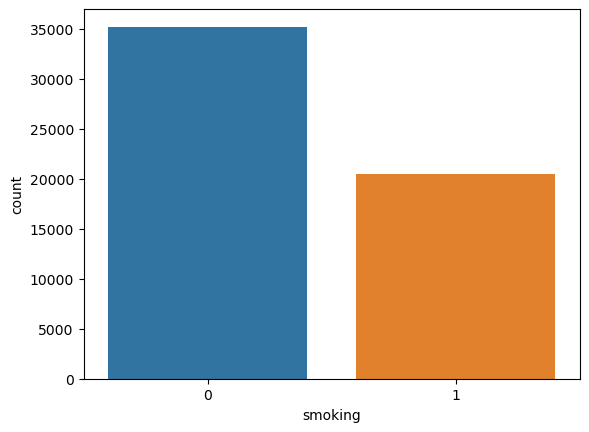

In [44]:
sns.countplot(data=data, x='smoking')

[Q2]
해당
데이터셋의
종속변
수와
설명변수는
어떤
것들이
있는가
?
분석
전에
아래
두
가지
질문에
대해서
스스로
생각해보고
답변을
하시오
.

1.이
데이터에서
제공된
설명변수들
중에서
높은
상관관계가
있을
것으로
예상되는
변수들은
어떤
것들이
있는가
?
왜
그렇게
생각하는가
?

2.제공된
설명변수들
중에서
종속변수를
예측하는데
필요하지
않을
것으로
예상되는
변수들은
어떤
것들이
있는가
?
왜
그렇게
생각하는가

### Correlation plot

In [47]:
X = data.drop(columns=['smoking']) #Explanatory Variable
y = data['smoking'] #Independent Variable

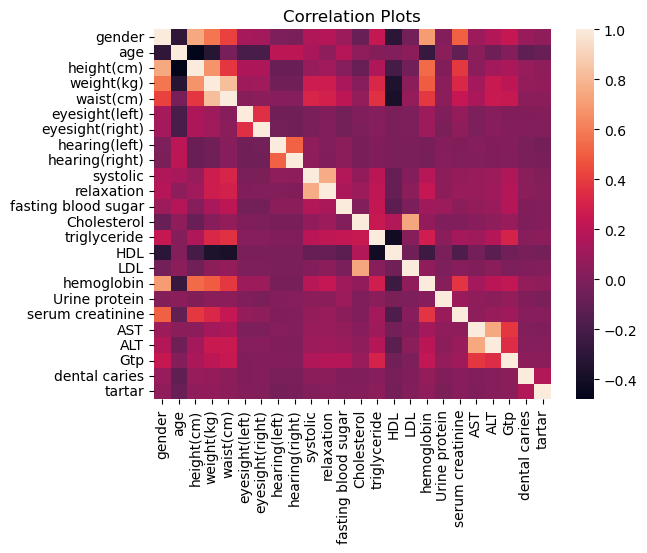

In [48]:
def correlation_plot(data, except_columns_start:int = -1):   
    corr = data.iloc[:,:except_columns_start].corr()
    sns.heatmap(corr)
    plt.title("Correlation Plots")
    plt.show()
    
correlation_plot(data,)

- 나이, 심장병의 경우 큰 상관관계가 있을 것으로 보인다. 

- 반면 gender나 regidence type의 경우는 별로 상관관계가 크지 않을 것으로 보인다.

### Scatter Plot

이진 분류 문제여서 Scatter Plot으로 알 수 있는 정보가 너무 적다.

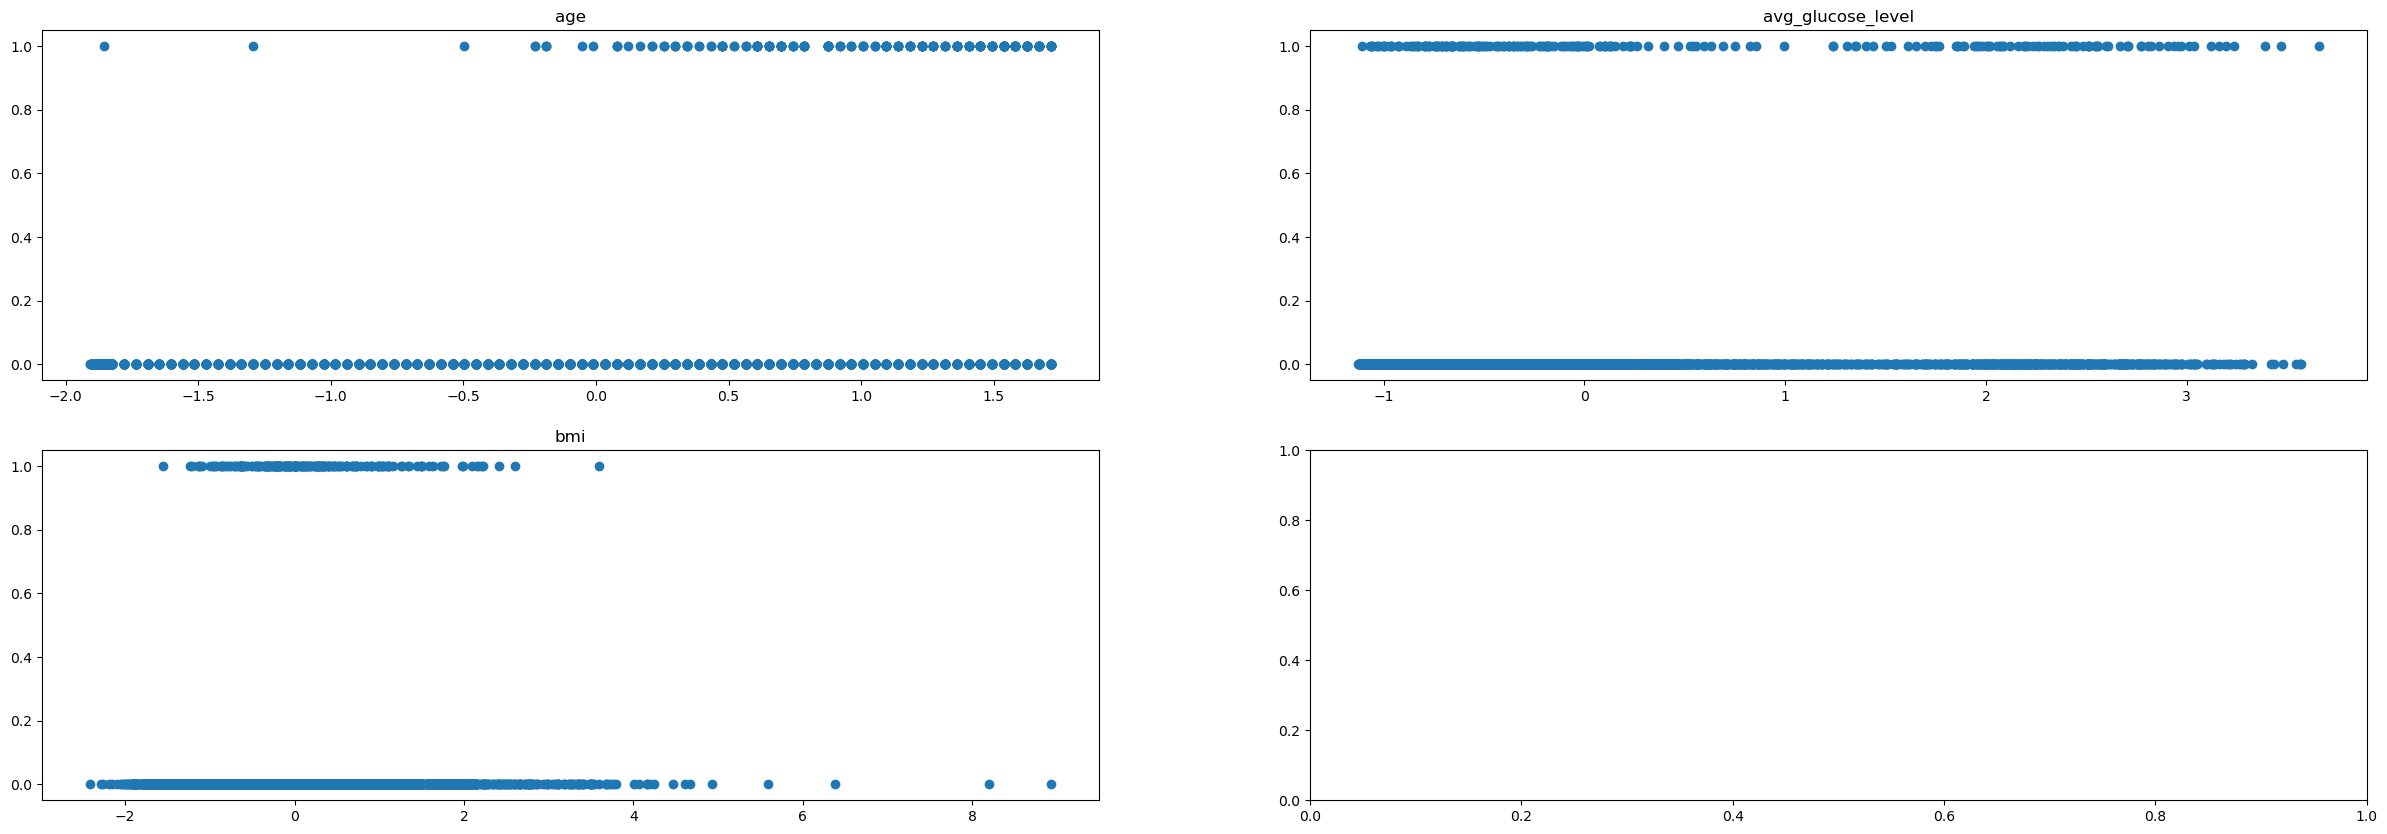

In [30]:
def scatter_plot_desplay(X, y, numerical_columns: list):
    X = X.iloc[:,numerical_columns]
    fig, axs = plt.subplots(2,len(X.columns)//2+1,figsize=(30,10))

    k , j = 0, 0
    for i in range(len(X.columns)):
        if i == len(X.columns)//2+1:
            k +=1
            j = 0
        axs[k,j].scatter(X.iloc[:,i], y)
        axs[k,j].set_title(X.columns[i])
        j +=1

    plt.show()
    
    
numerical_columns = [1,6,7]
scatter_plot_desplay(X,y,numerical_columns)

[Q3]
모든
연속형
숫자
형태를
갖는
(
명목형
변수
제외
)
개별
입력
변수들에
대하여
각각
다음과
같은
단변
량
통계량을
계산하고
Box plot
을
도시하시오
:
Mean, Standard deviation, Skewness, Kurtosis.


전체
변수
중에서
정규분포를
따른다고
할
수
있는
변수들은
몇
개인가
?
정규분포를
따른다고
가정한
근거는
무엇인
가
?

In [31]:
def statistics(data, numerical_columns:int):
    """
    input: Pandas DataFrame, 제외할 Column 시작 index number
    output: statistics DataFrame
    """
    df_stat = pd.DataFrame(columns = ['mean','std','skewness','skew_pvalue','kurtosis','kurtosis_pvalue'])
    data = data.iloc[:,numerical_columns]
    for i in data.columns:
        feature = data[i]
        feature_name = i
        
        mean = np.mean(feature)
        std = np.std(feature)
        skewness = skew(feature)
        kurtosis_ = kurtosis(feature)
        
        stats = {'mean': round(mean,5),'std':round(std,5),'skewness':round(skewness[0],5),'skew_pvalue':round(skewness[1],5),'kurtosis':round(kurtosis_[0],5),'kurtosis_pvalue':round(kurtosis_[1],5)}
        con = pd.DataFrame(stats,index=[feature_name])
        df_stat = pd.concat([df_stat,con],axis=0)
    display(df_stat)

In [32]:
statistics(data, numerical_columns)

,mean,std,skewness,skew_pvalue,kurtosis,kurtosis_pvalue
age,0.0,1.0,-3.99634,0.00006,-33.22586,0.0
avg_glucose_level,-0.0,1.0,33.66894,0.00000,13.99051,0.0
bmi,-0.0,1.0,26.00856,0.00000,20.82332,0.0


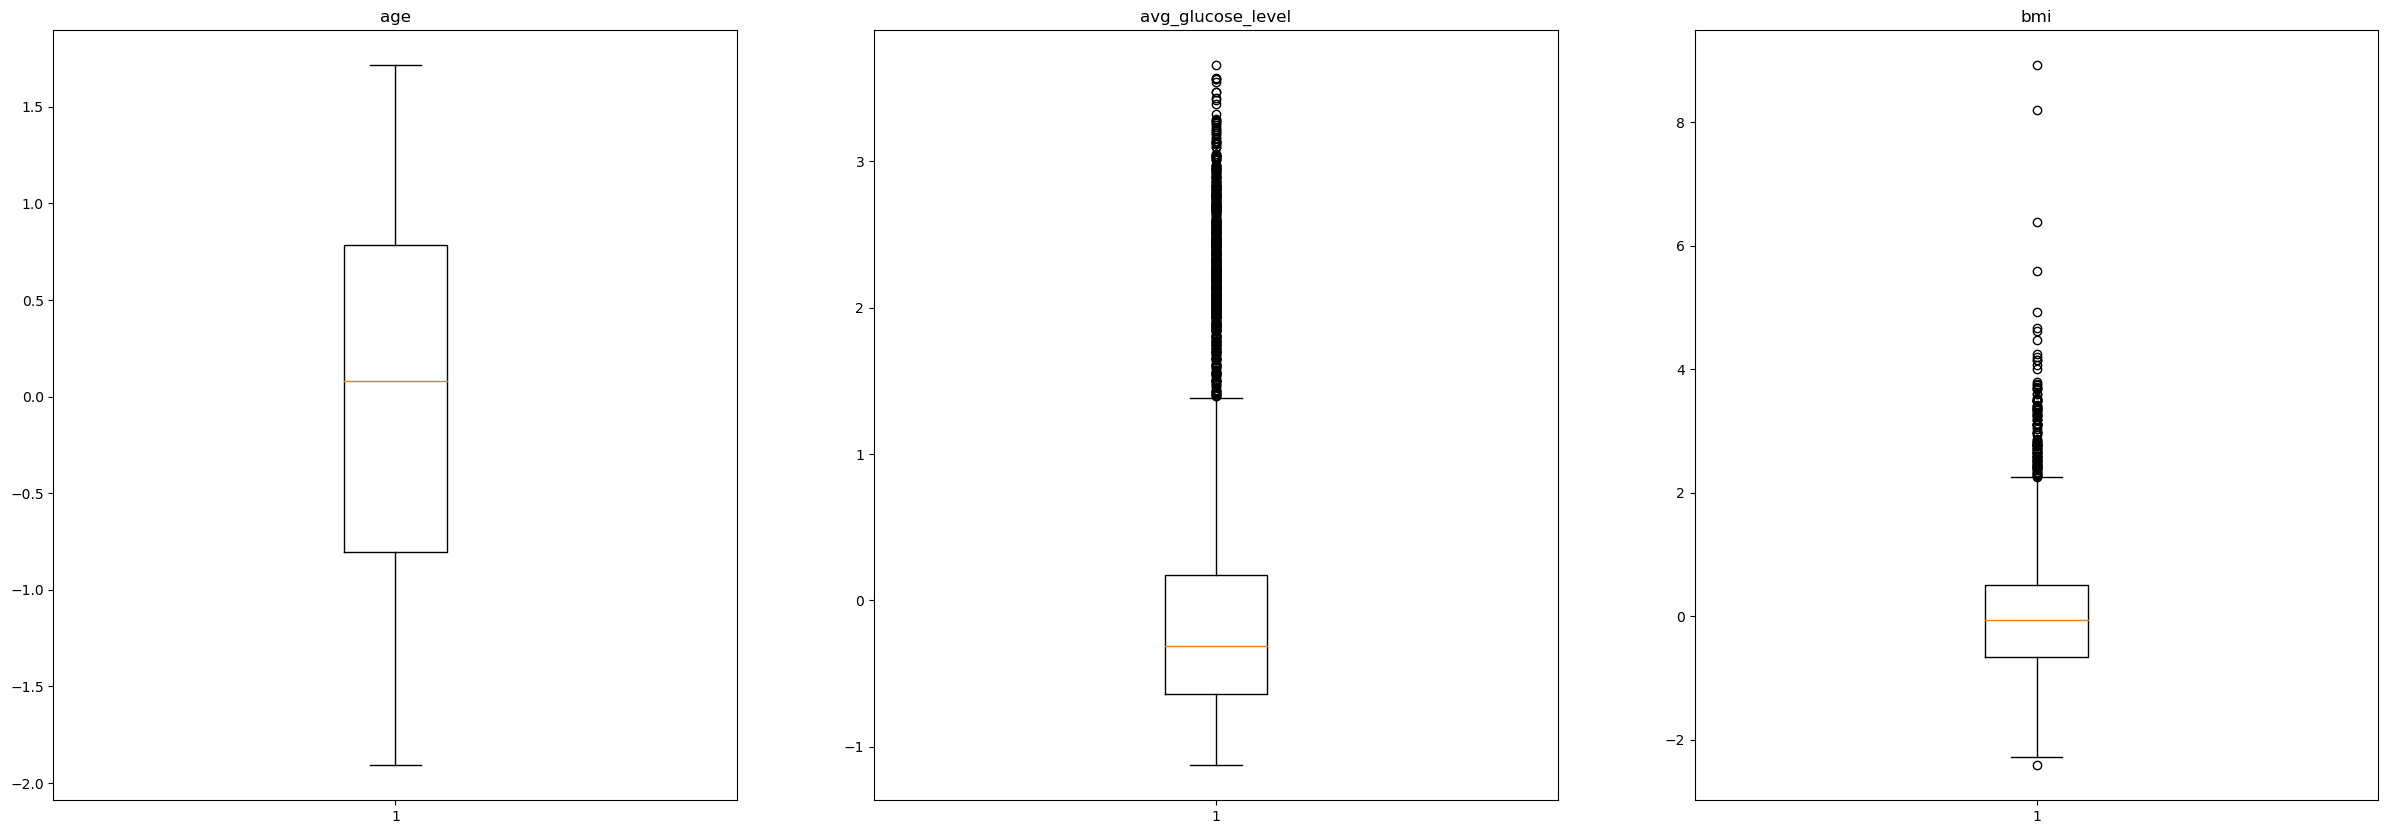

In [33]:
def box_plot_display(data, numerical_columns:list):
    data = data.iloc[:,numerical_columns]
    fig, axs = plt.subplots(1,len(data.columns),figsize=(30,10))

    # Create a boxplot for each dataframe
    for i in range(len(data.columns)):
        axs[i].boxplot(data.iloc[:,i].to_numpy(),whis=1.5)
        axs[i].set_title(data.columns[i])

    plt.show()
    
box_plot_display(data,numerical_columns)

[Q4]
[Q
3
]
의
Box plot
을
근거로
각
변수들에
대한
이상치
(
너무
값이
크거나
작은
객체
)
조건을
정의하고
,
해당하는
객체들을
데이터셋에서
제거해
보시오
.

In [34]:
def outlier_erase(data, numerical_columns:list):
    df = data.iloc[:,numerical_columns]
    Q3 = df.quantile(0.75)
    Q1 = df.quantile(0.25)
    IQR = Q3 - Q1
    K = 1.5
    upper = df[Q1 - K*IQR < df].notna()
    under = df[Q3 + K*IQR > df].notna()
    row_index = []
    for i in range(len(data)):
        if (df[upper * under].iloc[i].isna().value_counts()[0]) == len(df.columns):
            row_index.append(i)
            
    dt_outlier_ers = data.iloc[row_index]
    dt_outlier_ers.index = list(range(len(dt_outlier_ers)))
    return dt_outlier_ers

dt_outlier_ers = outlier_erase(data, numerical_columns)

In [35]:
dt_outlier_ers

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.626174,0,1,1,0,-0.004867,0.468399,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1.360821,1,1,1,0,-0.796156,-0.194155,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,1.139693,0,0,0,1,-0.259502,-0.791753,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0.697438,0,0,1,0,-0.662324,-0.000165,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,1.537723,0,0,1,1,-1.050570,-0.609876,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,0,1.626174,1,0,1,1,-0.494481,-0.000165,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4386,0,1.670400,0,0,1,1,0.420922,1.442744,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4387,0,-0.363976,0,0,1,0,-0.511266,0.221565,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4388,1,0.343633,0,0,1,0,1.328375,-0.427998,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


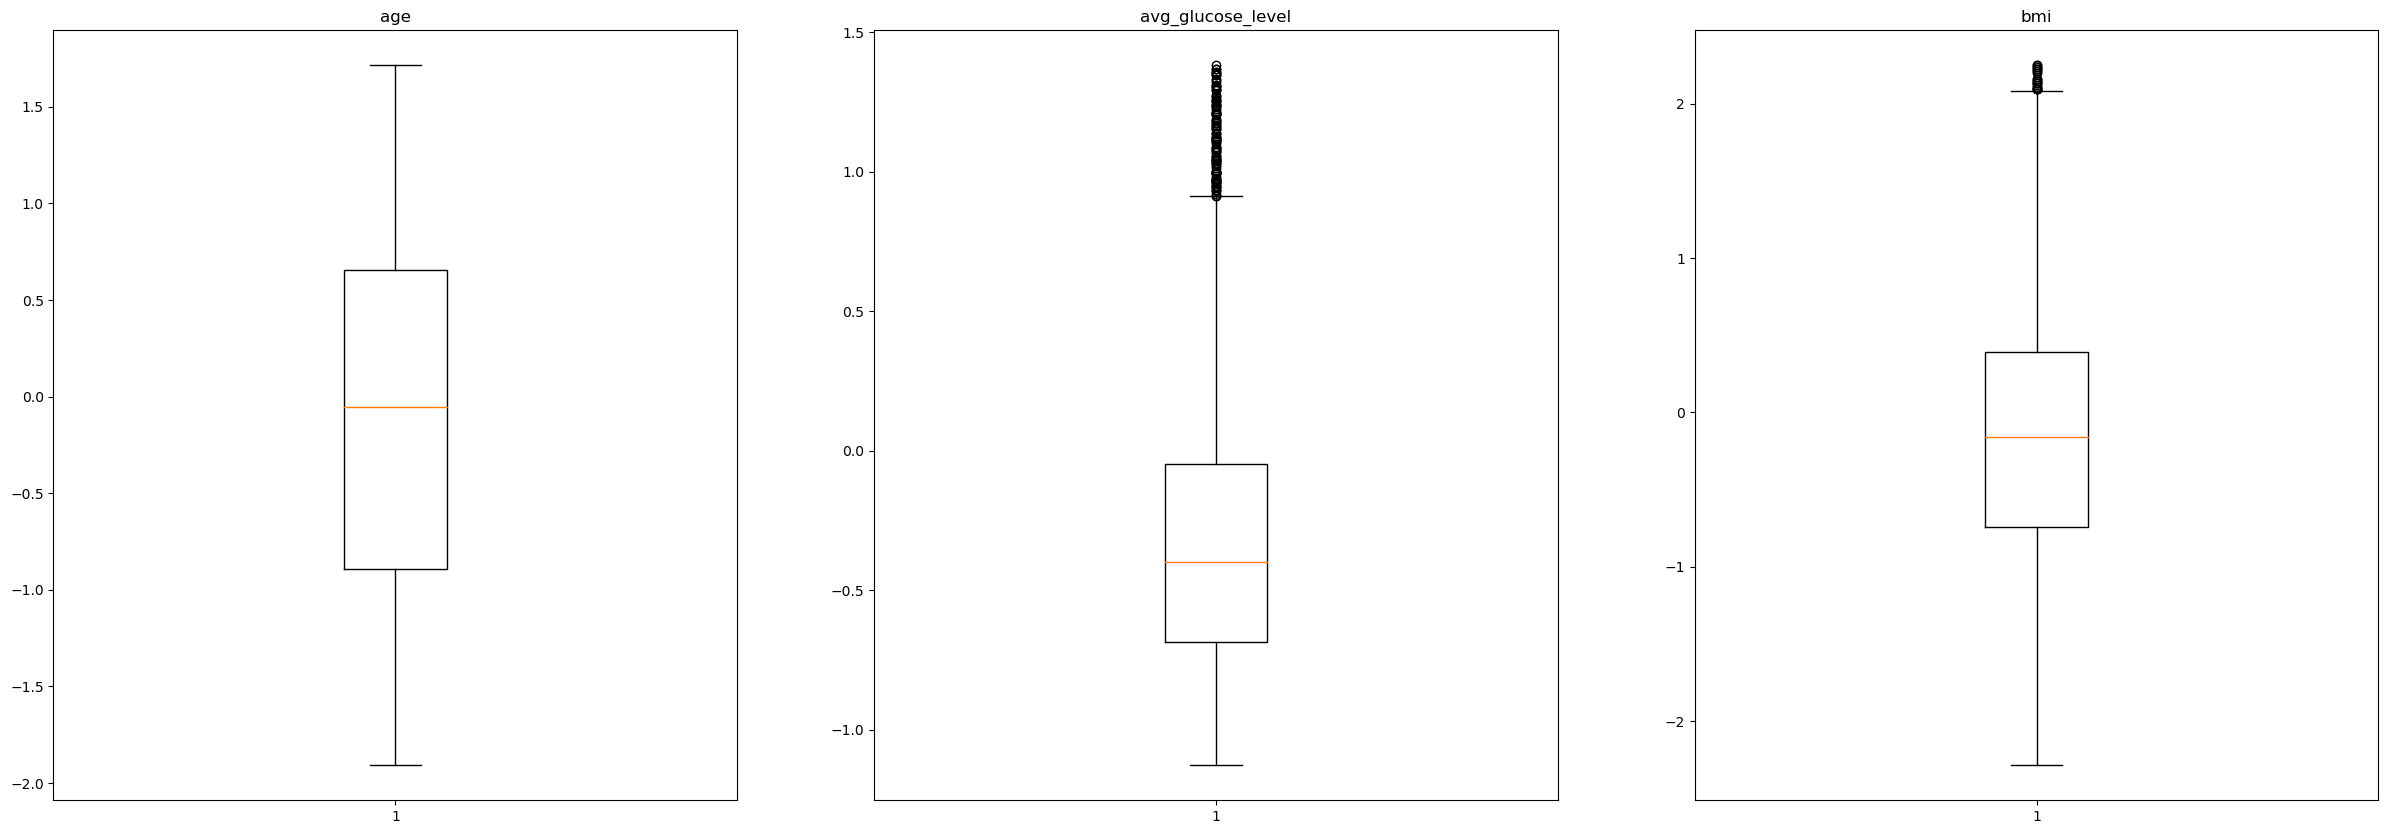

In [36]:
box_plot_display(dt_outlier_ers,numerical_columns)


<Axes: xlabel='stroke', ylabel='count'>

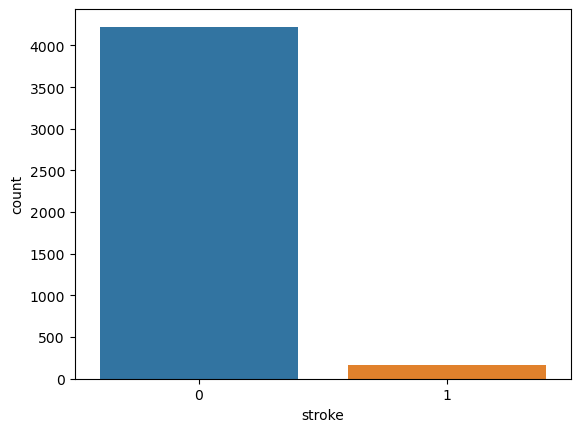

In [37]:
sns.countplot(data=dt_outlier_ers, x='stroke')

[Q5]
가능한
모든
두
쌍의
입력
변수
조합에
대한
산점도
(
scatter plot)
를
도시하고
적절한
정량적
지표를
사용하여
상관관계를
판단해
보시오
.

1. 어떤
두
조합의
변수들이
서로
강한
상관관계가
있다고
할
수
있는가
?

2. 강한
상관관계가
존재하는
변수
조합들
중에
대표
변수를
하나씩만
선택해서
전체
변수의
개수를
감소시켜
보시오
([Q7]
에서
사용함
)

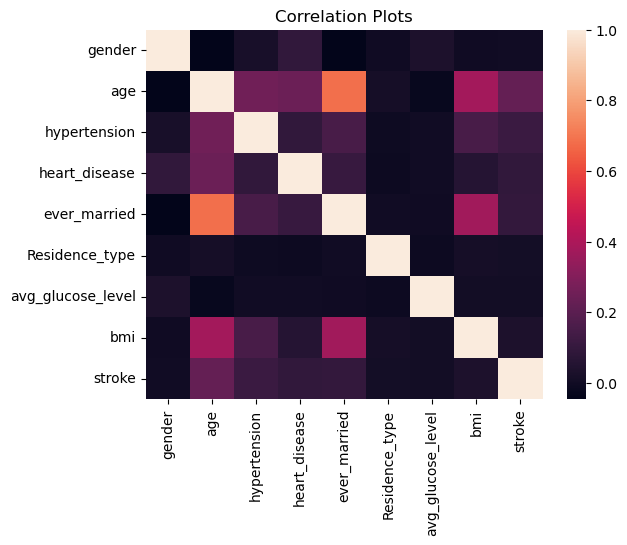

In [38]:
correlation_plot(dt_outlier_ers,9)

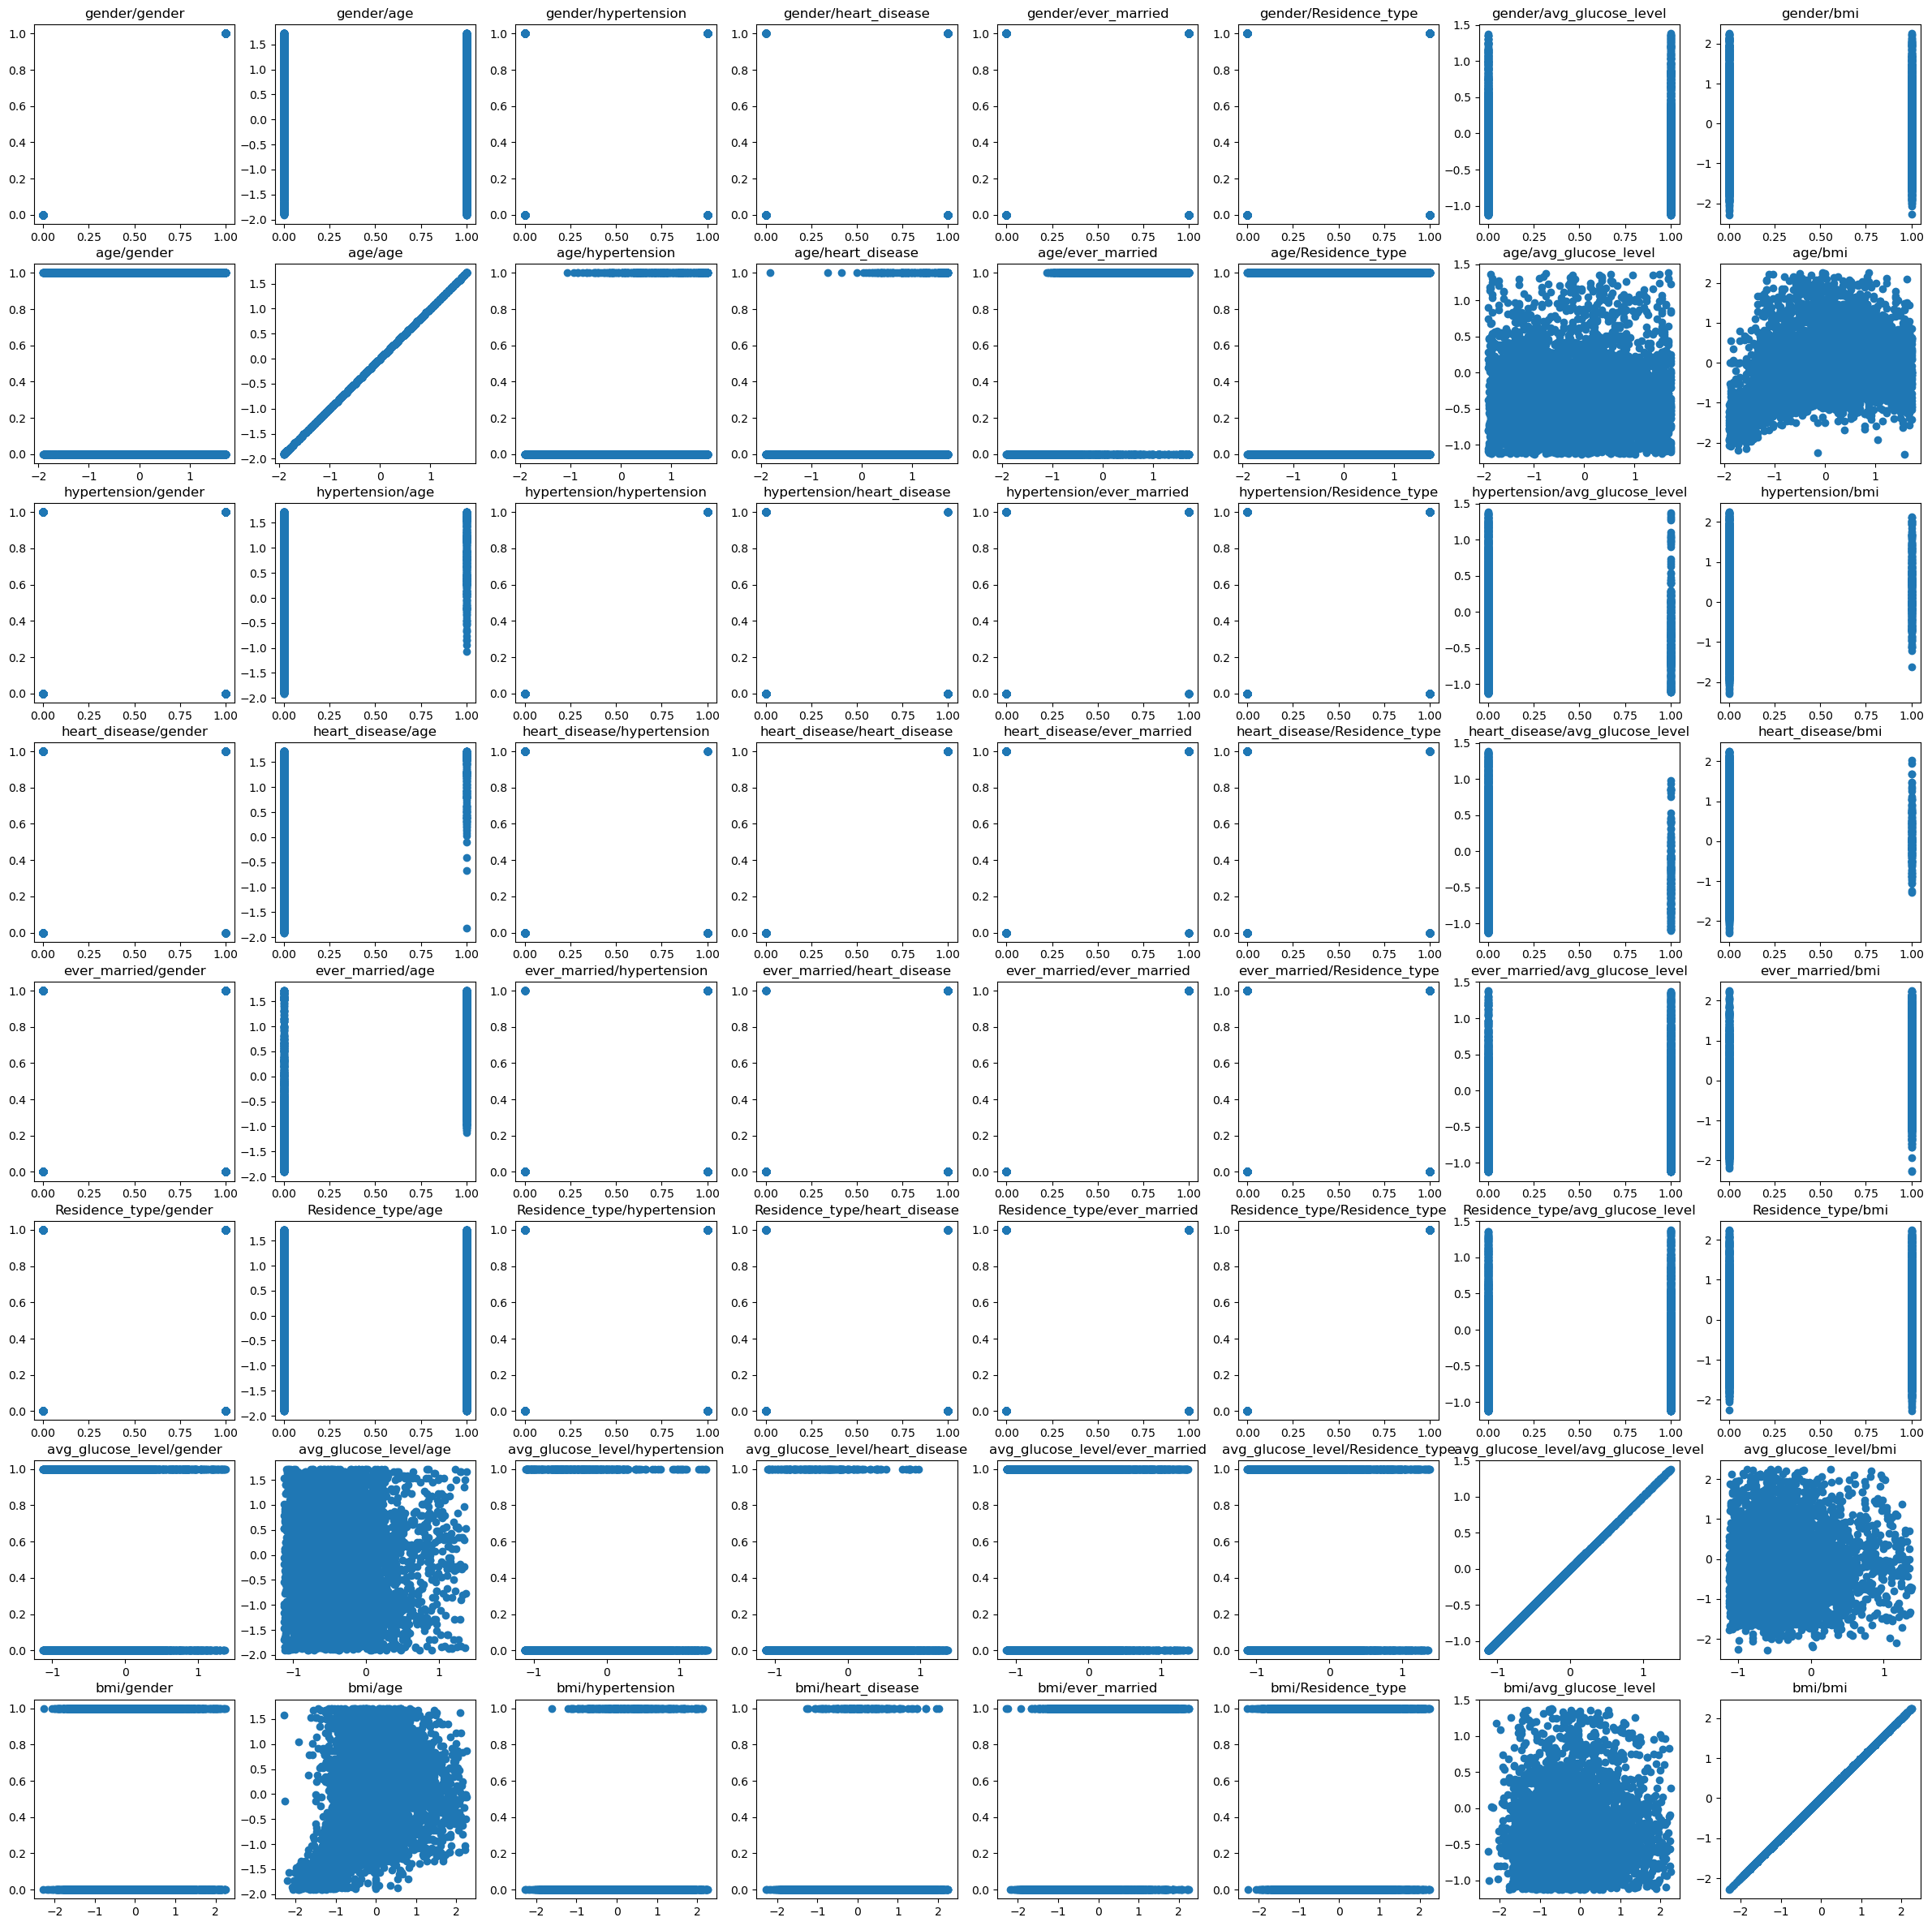

In [39]:
def scatter_plot_desplay_Xs(data,except_columns_start:int):
    X = data.iloc[:,:except_columns_start]
    num_var = len(X.columns)
    
    fig, axs = plt.subplots(num_var,num_var,figsize=(30,30))

    for i in range(num_var):
        for j in range(num_var):
            axs[i,j].scatter(X.iloc[:,i], X.iloc[:,j])
            axs[i,j].set_title(str(X.columns[i])+'/'+ str(X.columns[j]))

    plt.show()
    
    
X = dt_outlier_ers.drop(columns=['stroke'],axis=1)
scatter_plot_desplay_Xs(X, 8)

age, ever_married, bmi 사이에 강한 상관관계가 존재한다. -> age 제외 모두 Drop

In [40]:
q7_data = dt_outlier_ers.drop(columns=['ever_married','bmi'])

In [41]:
q7_data

,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1.626174,0,1,0,-0.004867,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1.360821,1,1,0,-0.796156,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,1.139693,0,0,1,-0.259502,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0.697438,0,0,0,-0.662324,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,1.537723,0,0,1,-1.050570,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,0,1.626174,1,0,1,-0.494481,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4386,0,1.670400,0,0,1,0.420922,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4387,0,-0.363976,0,0,0,-0.511266,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4388,1,0.343633,0,0,0,1.328375,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Train and Analysis

[Q6]
전체
데이터셋을
70%
의
학습
데이터와
30%
의
테스트
데이터로
분할한
후
모든
변수를
사용하여
Logistic
Regression
모델을
학습해
보시오
.
이
때
70:30
으로
구분하는
random
seed
를
저장하시오

1. 유의수준
0.05
에서
유효한
변수의
수는
몇
개인지
확인하고
각
변수들이
본인의
상식
선에서
실제로
유효하다고
할
수
있는지
판단해
보시오
.

2. [Q2]
에서
정성적으로
선택했던
변수들의
P-value
를
확인하고
해당
변수가
모델링
측면에
서
실제로
유효하지
않는
것인지
확인해
보시오
.

3. 학습
데이터와
테스트
데이터에
대한
Confusion
Matrix
를
생성하고
Simple
Accuracy,
Balanced
Correction
Rate
,
F1-Measure
를
산출하여
비교해
보시오

4. 학습
데이터와
테스트
데이터에
대한
AUROC
를
산출하는
함수를
직접
작성하고
이를
사용
하여
학습
/
테스트
데이터셋에
대한
AUROC
를
비교해
보시오


In [74]:
# Performance evaluation function for Classification --------------------------
def perf_eval_clf(y_true: Union[np.array,list], y_pred: Union[np.array,list])->list:
    """
    Input:
    y_true : ndarray of shape (n_samples,)
    y_pred : ndarray of shape (n_samples,)
    Return:
    [True_positive_rate(Recall),Precision,True_negative_rate, Accuracy, BCR, F1-score]: scores of classification in a list
    """
    cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("Confusion_matrix")    
    display(pd.DataFrame({'Positive':[tp,fp],'Negative':[fn,tn]},index=['True','False']))

    TPR = round(tp/(tp+fn),3) #recall
    TNR = round(tn/(tn+fp),3)
    PRE = round(tp/(tp+fp),3)
    ACC = round((tp+tn)/(tp+tn+fp+fn),3)
    BCR = round(np.sqrt([TPR*TNR])[0],3)  
    F1 = round((2*TPR*PRE)/(TPR+PRE),3)  
    
    return [TPR, PRE, TNR, ACC, BCR, F1]
    

In [54]:
def logit_pvalue(model,x,feature_names,cls=0):
    p1 = model.predict_proba(x)
    n1 = len(p1)
    m1 = len(model.coef_[cls]) + 1
    if len(model.intercept_)>1:
        feature_names=['constant'] + feature_names
        coefs = np.concatenate([np.array(model.intercept_[cls].reshape(1,)), model.coef_[cls]])
    elif len(model.intercept_)==1:
        feature_names=['constant'] + feature_names
        coefs = np.concatenate([model.intercept_, model.coef_[0]])
    else:
        coefs = model.coef_[cls]
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p1[i,1] * p1[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 = coefs/se
    p1 = (1 - norm.cdf(abs(t1))) * 2
    pvalue_dict = {key:round(value,4) for key,value in zip(feature_names,p1)}
    display(pd.DataFrame(pvalue_dict,columns=pvalue_dict.keys(),index=['P-value']).T)
    return pvalue_dict

In [55]:
def display_coefs(model, name: str) -> None:
    """
    input:
    model: fitted model with given variables
    name: name of the model
    """
    features = ['Constant']+model.feature_names_in_.tolist() if model.intercept_ else model.feature_names_in_.tolist()
    coefs = [model.intercept_[0]]+model.coef_[0].tolist() if model.intercept_ else model.coef_[0].tolist()
    print(f'Model : {name}')
    display(pd.DataFrame({'features':features,'coefs':coefs}))

In [56]:
def display_result(result_dict: dict, metric_names: list = ['TPR(Recall)','Precision','TNR','ACC','BCR','F1']):
    
    result_df = pd.DataFrame(result_dict).T
    result_df.index = list(result_dict.keys())
    result_df.columns = metric_names
    
    display(result_df)
    
result_dict = {}

In [57]:
original_data = dt_outlier_ers

split_params = {
    'test_size':0.3,
    'random_state': 1999
    }
df_train, df_test = train_test_split(original_data, **split_params)

In [68]:
x_trn, y_trn, x_tst, y_tst = df_train.drop(columns=['stroke']),df_train['stroke'],df_test.drop(columns=['stroke']),df_test['stroke']
feature_names = list(x_trn.columns)

In [75]:
seed = 1234
full_config = {
    'penalty': None,
    'fit_intercept':True,
    'max_iter':int(1e+5),
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1
}

#solving name of the selected features
features_dict = {}
features_dict['All Variables'] = ['constant']+feature_names

full_model = LogisticRegression(**full_config).fit(x_trn,y_trn)
logit_pvalue(full_model, x_trn, feature_names)

y_pred_train = full_model.predict(x_trn)
y_pred = full_model.predict(x_tst)
print("Train dataset")
perf_eval_clf(y_trn,y_pred_train)
print("Test dataset")
result_dict['All variables'] = perf_eval_clf(y_tst,y_pred)
display_coefs(full_model, 'All_variables')
display_result(result_dict,)

,P-value
constant,0.0006
gender,0.5320
age,0.0000
hypertension,0.0038
heart_disease,0.9438
ever_married,0.2776
Residence_type,0.4262
avg_glucose_level,0.9480
bmi,0.8644
work_type_Govt_job,0.1772


Train dataset
Confusion_matrix


,Positive,Negative
True,0,121
False,0,2952


Test dataset
Confusion_matrix


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2556\962847784.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  PRE = round(tp/(tp+fp),3)


,Positive,Negative
True,0,44
False,0,1273


Model : All_variables


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2556\962847784.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
  PRE = round(tp/(tp+fp),3)


,features,coefs
0,Constant,-2.726703
1,gender,-0.128362
2,age,1.782032
3,hypertension,0.689528
4,heart_disease,-0.022900
5,ever_married,-0.325824
6,Residence_type,0.158071
7,avg_glucose_level,-0.012659
8,bmi,-0.024728
9,work_type_Govt_job,-1.244122


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All variables,0.0,NaN,1.0,0.967,0.0,NaN


모두 Negative로 예측한 이상한 모델이 되어버렸다.

타겟변수 분포에서 stroke가 아닌 경우가 너무 많아서 이런 결과가 나온 것으로 보여진다.